In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers import scikit_learn
import joblib
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm

In [3]:
game_data=pd.read_csv('final_scrapped_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (36,39,45,48,52,53,63,158,161,167,170,174,175,186) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
game_data.reset_index(inplace=True)

In [7]:
team_winning_percent=game_data['Host_won'].value_counts(ascending=True,normalize=True)

In [9]:
team_winning_percent

0    0.459202
1    0.540798
Name: Host_won, dtype: float64

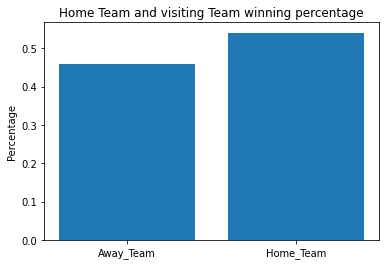

<Figure size 1440x2304 with 0 Axes>

In [12]:
team_status=['Away_Team','Home_Team']
plt.bar(team_status,[team_winning_percent[0],team_winning_percent[1]])
plt.ylabel("Percentage")
plt.title("Home Team and visiting Team winning percentage")
plt.figure(figsize=(20,32))
plt.show()

In [15]:
team_percent_year=pd.DataFrame(game_data.groupby(by='year')['Host_won'].value_counts(normalize = 'True'))

In [16]:
team_percent_year=team_percent_year.unstack()['Host_won']

In [17]:
team_percent_year

Host_won,0,1
year,,
20152016,0.473490,0.526510
20162017,0.435709,0.564291
20172018,0.438869,0.561131
20182019,0.471539,0.528461
20192020,0.473077,0.526923
20202021,0.464886,0.535114


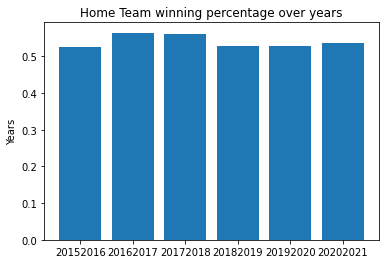

<Figure size 1152x2304 with 0 Axes>

In [18]:
team_status=['20152016','20162017','20172018','20182019','20192020','20202021']
plt.bar(team_status,team_percent_year[1])
plt.ylabel("Years")
plt.title("Home Team winning percentage over years")
plt.figure(figsize=(16,32))
plt.show()

In [19]:
accuracy_score(game_data['Host_won'],np.ones(len(game_data)))

0.5407981698017286

In [20]:
log_loss(game_data['Host_won'],np.repeat(game_data['Host_won'].value_counts(normalize=True)[1],len(game_data)))

0.6898144953295867

In [27]:
all_features=['match_BacktoBack','home_fwkSV%_GoalKeeper','home_GSAx/60_GoalKeeper','home_HDCSV%__GoalKeeper','guest_fwkSV%_GoalKeeper','guest_GSAx/60_GoalKeeper','guest_HDCSV%__GoalKeeper']
moving_featires_5 =['home_Fenwick%_SVA_TeamMoingAverage_5',
 'home_GF%_SVA_TeamMoingAverage_5',
 'home_xGF%_SVA_TeamMoingAverage_5',
 'home_SFGF%_SVA_TeamMoingAverage_5',
 'home_xGF_Average_pp_TeamMoingAverage_5',
 'home_GF_Average_Average_pp_TeamMoingAverage_5',
 'home_xGA_Average_pk_TeamMoingAverage_5',
 'home_GA_Average_Average_pk_TeamMoingAverage_5',
 'guest_Fenwick%_SVA_TeamMoingAverage_5',
 'guest_GF%_SVA_TeamMoingAverage_5',
 'guest_xGF%_SVA_TeamMoingAverage_5',
 'guest_SFGF%_SVA_TeamMoingAverage_5',
 'guest_xGF_Average_pp_TeamMoingAverage_5',
 'guest_GF_Average_Average_pp_TeamMoingAverage_5',
 'guest_xGA_Average_pk_TeamMoingAverage_5',
 'guest_GA_Average_Average_pk_TeamMoingAverage_5']+all_features

moving_featires_40 =['home_Fenwick%_SVA_TeamMoingAverage_40',
 'home_GF%_SVA_TeamMoingAverage_40',
 'home_xGF%_SVA_TeamMoingAverage_40',
 'home_SFGF%_SVA_TeamMoingAverage_40',
 'home_xGF_Average_pp_TeamMoingAverage_40',
 'home_GF_Average_Average_pp_TeamMoingAverage_40',
 'home_xGA_Average_pk_TeamMoingAverage_40',
 'home_GA_Average_Average_pk_TeamMoingAverage_40',
 'guest_Fenwick%_SVA_TeamMoingAverage_40',
 'guest_GF%_SVA_TeamMoingAverage_40',
 'guest_xGF%_SVA_TeamMoingAverage_40',
 'guest_SFGF%_SVA_TeamMoingAverage_40',
 'guest_xGF_Average_pp_TeamMoingAverage_40',
 'guest_GF_Average_Average_pp_TeamMoingAverage_40',
 'guest_xGA_Average_pk_TeamMoingAverage_40',
 'guest_GA_Average_Average_pk_TeamMoingAverage_40']+all_features


In [28]:
noncategorical=['home_xGF_Average_pp_TeamMoingAverage_40', 
       'guest_xGF%_SVA_TeamMoingAverage_5',
       'home_GF%_SVA_TeamMoingAverage_40',
       'home_xGA_Average_pk_TeamMoingAverage_40',
       'home_xGA_Average_pk_TeamMoingAverage_5',
       'home_SFGF%_SVA_TeamMoingAverage_40', 
       'home_GSAx/60_GoalKeeper',
       'guest_GSAx/60_GoalKeeper',
       'guest_GF%_SVA_TeamMoingAverage_5',
       'home_xGF%_SVA_TeamMoingAverage_40', 
       'home_GF_Average_Average_pp_TeamMoingAverage_5',
       'home_GF%_SVA_TeamMoingAverage_5',
       'home_Fenwick%_SVA_TeamMoingAverage_5',
       'guest_xGF_Average_pp_TeamMoingAverage_5',
       'guest_xGF_Average_pp_TeamMoingAverage_40',
       'home_GA_Average_Average_pk_TeamMoingAverage_40',
       'home_HDCSV%__GoalKeeper',
       'guest_GA_Average_Average_pk_TeamMoingAverage_5',
       'guest_GF_Average_Average_pp_TeamMoingAverage_40',
       'home_xGF%_SVA_TeamMoingAverage_5',
       'guest_SFGF%_SVA_TeamMoingAverage_5',
       'home_xGF_Average_pp_TeamMoingAverage_5',
       'guest_xGF%_SVA_TeamMoingAverage_40',
       'home_GA_Average_Average_pk_TeamMoingAverage_5',
       'guest_GF_Average_Average_pp_TeamMoingAverage_5',
       'guest_GF%_SVA_TeamMoingAverage_40',
       'guest_SFGF%_SVA_TeamMoingAverage_40',
       'guest_Fenwick%_SVA_TeamMoingAverage_5',
       'home_fwkSV%_GoalKeeper',
       'guest_HDCSV%__GoalKeeper',
       'guest_xGA_Average_pk_TeamMoingAverage_40',
       'home_SFGF%_SVA_TeamMoingAverage_5',
       'guest_xGA_Average_pk_TeamMoingAverage_5',
       'home_Fenwick%_SVA_TeamMoingAverage_40',
       'guest_fwkSV%_GoalKeeper',
       'guest_Fenwick%_SVA_TeamMoingAverage_40',
       'home_GF_Average_Average_pp_TeamMoingAverage_40',
       'guest_GA_Average_Average_pk_TeamMoingAverage_40']

In [23]:
noncategorical_40=['home_xGF_Average_pp_TeamMoingAverage_40', 
       'home_GF%_SVA_TeamMoingAverage_40',
       'home_xGA_Average_pk_TeamMoingAverage_40',
       'home_SFGF%_SVA_TeamMoingAverage_40', 
       'home_GSAx/60_GoalKeeper',
       'guest_GSAx/60_GoalKeeper',
       'home_xGF%_SVA_TeamMoingAverage_40', 
       'guest_xGF_Average_pp_TeamMoingAverage_40',
       'home_GA_Average_Average_pk_TeamMoingAverage_40',
       'home_HDCSV%__GoalKeeper',
       'guest_GF_Average_Average_pp_TeamMoingAverage_40',
       'guest_xGF%_SVA_TeamMoingAverage_40',
       'guest_GF%_SVA_TeamMoingAverage_40',
       'guest_SFGF%_SVA_TeamMoingAverage_40',
       'home_fwkSV%_GoalKeeper',
       'guest_HDCSV%__GoalKeeper',
       'guest_xGA_Average_pk_TeamMoingAverage_40',
       'home_Fenwick%_SVA_TeamMoingAverage_40',
       'guest_fwkSV%_GoalKeeper',
       'guest_Fenwick%_SVA_TeamMoingAverage_40',
       'home_GF_Average_Average_pp_TeamMoingAverage_40',
       'guest_GA_Average_Average_pk_TeamMoingAverage_40']

In [24]:
scoring = ['neg_log_loss', 'accuracy']

In [29]:
X_train=game_data[game_data['year']!=20202021].dropna().loc[:,moving_featires_40]
y_train=game_data[game_data['year']!=20202021].dropna()['Host_won']
X_test=game_data[game_data['year']==20202021].loc[:,moving_featires_40]
y_test=game_data[game_data['year']==20202021]['Host_won']

In [30]:
X_train

,home_Fenwick%_SVA_TeamMoingAverage_40,home_GF%_SVA_TeamMoingAverage_40,home_xGF%_SVA_TeamMoingAverage_40,home_SFGF%_SVA_TeamMoingAverage_40,home_xGF_Average_pp_TeamMoingAverage_40,home_GF_Average_Average_pp_TeamMoingAverage_40,home_xGA_Average_pk_TeamMoingAverage_40,home_GA_Average_Average_pk_TeamMoingAverage_40,guest_Fenwick%_SVA_TeamMoingAverage_40,guest_GF%_SVA_TeamMoingAverage_40,...,guest_GF_Average_Average_pp_TeamMoingAverage_40,guest_xGA_Average_pk_TeamMoingAverage_40,guest_GA_Average_Average_pk_TeamMoingAverage_40,match_BacktoBack,home_fwkSV%_GoalKeeper,home_GSAx/60_GoalKeeper,home_HDCSV%__GoalKeeper,guest_fwkSV%_GoalKeeper,guest_GSAx/60_GoalKeeper,guest_HDCSV%__GoalKeeper
537,49.351852,48.058252,46.233245,8.439898,0.038724,0.040564,0.045034,0.043842,48.270585,46.636771,...,0.042918,0.045299,0.049108,Neither,0.935132,0.070875,0.880000,0.927564,0.073330,0.844633
541,49.953140,49.514563,51.340908,8.869565,0.045359,0.041821,0.043428,0.042231,51.252914,47.058824,...,0.039316,0.038820,0.044230,Neither,0.947970,0.071198,0.881773,0.923362,0.067306,0.851752
547,48.545225,49.065421,48.120418,9.028375,0.038105,0.043232,0.041082,0.044878,51.155809,59.420290,...,0.050492,0.041264,0.034483,Neither,0.942249,0.065505,0.863636,0.950065,0.063670,0.865482
554,51.292477,46.798030,55.449661,7.844756,0.048608,0.038906,0.039053,0.044230,49.643411,49.753695,...,0.041411,0.044760,0.041411,Neither,0.946008,0.068456,0.885645,0.948954,0.071118,0.883450
555,51.292477,46.798030,55.449661,7.844756,0.048608,0.038906,0.039053,0.044230,49.643411,49.753695,...,0.041411,0.044760,0.041411,Neither,0.925788,0.067392,0.852151,0.948954,0.071118,0.883450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,47.988669,50.775194,46.404325,10.764174,0.045798,0.054181,0.052895,0.052527,47.224670,46.929825,...,0.043997,0.046366,0.049754,Neither,0.929348,0.077645,0.851931,0.940709,0.070680,0.864444
6711,47.394614,51.383399,49.105429,10.851419,0.046539,0.053764,0.048234,0.050869,48.507042,51.239669,...,0.051318,0.050408,0.048835,Neither,0.929306,0.068514,0.847545,0.941071,0.080295,0.866530
6712,49.971380,42.424242,49.299920,8.039377,0.045267,0.040125,0.046553,0.054455,50.377986,53.556485,...,0.052600,0.045762,0.045614,Neither,0.920281,0.074883,0.827935,0.938366,0.062687,0.882038
6713,52.290406,53.617021,52.259938,9.647779,0.047481,0.051951,0.043375,0.044941,49.055031,52.075472,...,0.057217,0.053527,0.052656,guest_only,0.943240,0.066415,0.864362,0.931459,0.082033,0.858427


In [34]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_features = ['match_BacktoBack']
categorical_transformer = Pipeline(steps=[('ohe', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, noncategorical_40),
        ('cat', categorical_transformer, categorical_features)])
log_40_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('logisticregression', LogisticRegression(max_iter=10000))])

In [35]:
log_params = {'logisticregression__solver' : ['liblinear', 'lbfgs', 'newton-cg'],
                'logisticregression__penalty': ['l1', 'l2'],
                'logisticregression__C': [.01, 0.1, 1, 10],
                'logisticregression__class_weight': [None] }

log_cv_40 = GridSearchCV(log_40_pipeline, param_grid=log_params, cv=5, scoring=scoring, refit = 'neg_log_loss',  verbose=1)

In [36]:
log_cv_40.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['home_xGF_Average_pp_TeamMoingAverage_40',
                                                                          'home_GF%_SVA_TeamMoingAverage_40',
                                                                          'home_xGA_Average_pk_TeamMoingAverage_40',
                                                                          'home_SFGF%_SVA_TeamMoingAverage_40',
                                                                          'home_GSAx/60_GoalKeeper',
                                                                          'gu

In [37]:
ada_40_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('ada', AdaBoostClassifier())])

ada_params = {'ada__n_estimators': [25],
         'ada__learning_rate': [.01, .1, 1, 10],
         'ada__base_estimator': [svm.SVC(probability=True , kernel='linear'), LogisticRegression()],}

ada_cv_40 = GridSearchCV(ada_40_pipeline, param_grid=ada_params, cv=5, scoring=scoring, refit='neg_log_loss', verbose=1)

In [39]:
ada_cv_40.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['home_xGF_Average_pp_TeamMoingAverage_40',
                                                                          'home_GF%_SVA_TeamMoingAverage_40',
                                                                          'home_xGA_Average_pk_TeamMoingAverage_40',
                                                                          'home_SFGF%_SVA_TeamMoingAverage_40',
                                                                          'home_GSAx/60_GoalKeeper',
                                                                          'gu

In [42]:
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('gb', GradientBoostingClassifier())])

gb_params = {'gb__n_estimators': [200, 400],
         'gb__learning_rate': [.001,.01],
         'gb__max_depth' : [3,5]}

gb_cv = GridSearchCV(gb_pipeline, param_grid=gb_params, cv=5, scoring=scoring, refit='neg_log_loss', verbose=1)

In [43]:
gb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['home_xGF_Average_pp_TeamMoingAverage_40',
                                                                          'home_GF%_SVA_TeamMoingAverage_40',
                                                                          'home_xGA_Average_pk_TeamMoingAverage_40',
                                                                          'home_SFGF%_SVA_TeamMoingAverage_40',
                                                                          'home_GSAx/60_GoalKeeper',
                                                                          'gu

In [44]:
pred_df = game_data[game_data['year'] ==20202021].dropna().loc[:,['game_id',
 'date',
 'venue',
 'home_team',
 'away_team']]

In [50]:
prob1=log_cv_40.predict_proba(X_test)
accuracy1=accuracy_score(y_test, log_cv_40.predict(X_test))
logloss1=log_loss(y_test, log_cv_40.predict_proba(X_test))


0.5974282888229476

In [47]:
log_outpput=pd.concat([pred_df,pd.DataFrame(prob1,columns=['Away Win Probability','Home Win Probability'], index = y_test.index)],axis=1)

In [48]:
log_outpput.head(40)

,game_id,date,venue,home_team,away_team,Away Win Probability,Home Win Probability
6857,2.020020e+09,2021-01-13,Wells Fargo Center,PHI,PIT,0.475480,0.524520
6858,2.020020e+09,2021-01-13,Scotiabank Arena,TOR,MTL,0.399112,0.600888
6859,2.020020e+09,2021-01-13,Amalie Arena,T.B,CHI,0.354241,0.645759
6860,2.020020e+09,2021-01-13,Rogers Place,EDM,VAN,0.381560,0.618440
6861,2.020020e+09,2021-01-13,Ball Arena,COL,STL,0.392770,0.607230
6862,NaN,NaN,NaN,NaN,NaN,0.622470,0.377530
6863,NaN,NaN,NaN,NaN,NaN,0.585437,0.414563
6864,2.020020e+09,2021-01-14,Madison Square Garden,NYR,NYI,0.479315,0.520685
6865,2.020020e+09,2021-01-14,Little Caesars Arena,DET,CAR,0.667460,0.332540
6866,2.020020e+09,2021-01-14,Bridgestone Arena,NSH,CBJ,0.343463,0.656537


In [52]:
prob2=ada_cv_40.predict_proba(X_test)
accuracy2=accuracy_score(y_test, ada_cv_40.predict(X_test))
logloss2=log_loss(y_test, ada_cv_40.predict_proba(X_test))


In [55]:
ada_output=pd.concat([pred_df,pd.DataFrame(prob2,columns=['Away Win Probability','Home Win Probability'], index = y_test.index)],axis=1)

In [57]:
ada_output.head(40)

,game_id,date,venue,home_team,away_team,Away Win Probability,Home Win Probability
6857,2.020020e+09,2021-01-13,Wells Fargo Center,PHI,PIT,0.466490,0.533510
6858,2.020020e+09,2021-01-13,Scotiabank Arena,TOR,MTL,0.428432,0.571568
6859,2.020020e+09,2021-01-13,Amalie Arena,T.B,CHI,0.409783,0.590217
6860,2.020020e+09,2021-01-13,Rogers Place,EDM,VAN,0.426564,0.573436
6861,2.020020e+09,2021-01-13,Ball Arena,COL,STL,0.413880,0.586120
6862,NaN,NaN,NaN,NaN,NaN,0.537562,0.462438
6863,NaN,NaN,NaN,NaN,NaN,0.533731,0.466269
6864,2.020020e+09,2021-01-14,Madison Square Garden,NYR,NYI,0.489591,0.510409
6865,2.020020e+09,2021-01-14,Little Caesars Arena,DET,CAR,0.613444,0.386556
6866,2.020020e+09,2021-01-14,Bridgestone Arena,NSH,CBJ,0.428759,0.571241


In [58]:
prob3=gb_cv.predict_proba(X_test)
accuracy3=accuracy_score(y_test, gb_cv.predict(X_test))
logloss3=log_loss(y_test, gb_cv.predict_proba(X_test))


In [59]:
gradient_output=pd.concat([pred_df,pd.DataFrame(prob2,columns=['Away Win Probability','Home Win Probability'], index = y_test.index)],axis=1)

In [71]:
gradient_output.head(5)

,game_id,date,venue,home_team,away_team,Away Win Probability,Home Win Probability
6857,2.020020e+09,2021-01-13,Wells Fargo Center,PHI,PIT,0.466490,0.533510
6858,2.020020e+09,2021-01-13,Scotiabank Arena,TOR,MTL,0.428432,0.571568
6859,2.020020e+09,2021-01-13,Amalie Arena,T.B,CHI,0.409783,0.590217
6860,2.020020e+09,2021-01-13,Rogers Place,EDM,VAN,0.426564,0.573436
6861,2.020020e+09,2021-01-13,Ball Arena,COL,STL,0.413880,0.586120


In [69]:
print('Gradient Boosting Metrics:')
print('Accuracy Score',accuracy3)
print('Log Loss',logloss3)

print(' ')
print('Ada Boost Metrics:')
print('Accuracy Score',accuracy2)
print('Log Loss',logloss2)

print(' ')
print('Logistic Regression Metrics:')
print('Accuracy Score',accuracy1)
print('Log Loss',logloss1)

print(' ')

Gradient Boosting Metrics:
Accuracy Score 0.5548961424332344
Log Loss 0.6820880309979105
 
Ada Boost Metrics:
Accuracy Score 0.5984174085064293
Log Loss 0.6663586878443322
 
Logistic Regression Metrics:
Accuracy Score 0.5974282888229476
Log Loss 0.6615003709021545
 


In [ ]:
joblib.dump(log_cv_40,'log_40.pkl')

['log_40.pkl']